In [1]:
# %matplotlib notebook
from pymisca.util import *
from pymisca.vis_util import *
import IPython.display as ipd

import KBs
import random
import workers

DIR = 'data_pdist'
tst_dct = [{'family':'2dntca','rulestr':x[1]} for x in KBs.tst_data]
tst_out = mp_map(workers.worker0323,tst_dct,n_cpu=12)
print 'finished'

is in ipython: 1
[WARN] pymisca.vis_util cannot find network
finished


In [121]:
data = np.load('%s/reference.npy'%DIR).tolist()
dant = filter(lambda x:x.get('grade')=='anti',data)

In [8]:
from KBs import *
def sample(self,ini=None):
    if ini is None:
        ini=self.rdf().astype(int)
    avc = ini
    hist = np.zeros((self.hmax,)+avc.shape,dtype=np.int)
    for i in range(self.hmax):
        hist[i]=avc
        avc=(self.adv(avc)) 
    return hist
def hill(x):
    return 1-abs(2*x-1)
def sflatten(arr):
    return np.reshape(arr,(len(arr),-1))
def sexpand(arr,d=2):
    S = arr.shape
    root = int(round(S[1]**(1./d)) )
    out = np.reshape(arr,(S[0],)+(root,)*d)
    return out


In [131]:
np.ravel_multi_index(loc,env.dimsiz)

array([ 10954,  78338, 157841, 223509, 307603, 376142, 444688, 528777,
       597908, 671631])

In [8]:
# d = np.meshgrid()
# L = env.siz[-1]

# plt.imshow(X+Y)
env = KBs.guess(dct=tst_dct[8])
out = sample(env)

In [3]:
def imlstshow(imlst,mfcol=None,figsize=[12,6],vmin=0,vmax=1,**kwargs):
    if mfcol is None:
        mfcol = [int(len(imlst)**0.5)]*2
    fig,axs=plt.subplots(*mfcol,figsize=[12,6])
    for ax,i in zip(axs.ravel(),range(len(imlst))):
        im = imlst[i]
    #     if im.sum()==0:
    #         continue
        plt.sca(ax)
        plt.pcolormesh(sflatten(im),vmin=vmin,vmax=vmax,**kwargs)

In [49]:
def mutate(avc,idx,orig=1):
# if 1:
#     idx = np.array(idx)
    nsp = len(idx)
#     out = KBs.sample(env)
#     cmap = plt.get_cmap('rainbow')

    loc = np.vstack([
#         [0]*nsp,
                     range(0,nsp),
                    zip(*idx)]
                   )
    idx = np.ravel_multi_index(loc, (nsp,)+avc.shape[1:] )
    real = avc
    dev = np.repeat(real.copy(),nsp,axis=0)
    dev.flat[idx]=1-dev.flat[idx]
    if orig:
        dev = np.vstack([real,dev])
    return dev

def main(t=20,**kwargs):
    env = KBs.guess(**kwargs)
    env.change_size((20, 100, 30**2))
    ini = sample(env)[-1][0:1]
    L = ini.shape[-1]
    # idx = idx + np.array([[L//2,L//2]])
    idx = np.meshgrid(range(L),range(L))
    idx = zip(*[x.ravel() for x in idx])
    mut = mutate(ini,idx)

    out = sample(env,ini=mut)
    out = out[:50]
    SUM = out[:,1:] + out[:,0:1]
    flaw = SUM==1
    tSUM = (flaw).mean(axis=0)

    # imlstshow(tSUM[:5])
    # plt.show()
    fc = flaw[t:t+1]
    fN = fc.sum(axis=(2,3))
    c = fN/(L**2.)

    X = np.arange(0,L)
    X,Y = np.meshgrid(X,X)
    Xs = fc*X[None,None]
    Ys = fc*Y[None,None]
    Xm=abs(Xs.sum(axis=(2,3)).astype(float)/fN- X.T.ravel()[None])
    Ym=abs(Ys.sum(axis=(2,3)).astype(float)/fN- Y.T.ravel()[None])
    dN = np.minimum(Xm,L-Xm) + np.minimum(Ym,L-Xm)    
    
    BINS=np.linspace(0,0.15,20)
    fig,axs=plt.subplots(1,3,figsize=[12,4])
    plt.sca(axs[0])
#     plt.scatter(fN.ravel()/L**2.,dN.ravel()/L)
    plt.hist2d(fN.ravel()/(L**2.),dN.ravel()/L,
               bins=[np.linspace(0,0.5,30),    np.linspace(0,1.5,30)]
#                bins=[np.linspace(0,0.5,30),    np.linspace(0,1,30)]
              )
#     plt.hist(c.ravel(),bins=BINS,normed=1)
#     plt.ylim(0,50)
    # plt.xlim([0,])
    # plt.imshow((sexpand(dN))[0].T*(ini[0]-0.5))
    plt.sca(axs[1])
    # plt.imshow((sexpand(c))[0].T*(ini[0]-0.5),vmin=-.125,vmax=(t*0.5/L)**2)
    # plt.imshow((sexpand(c))[0].T*(ini[0]-0.5),vmin=0,vmax=(float(t)/L)**2)
    plt.imshow((sexpand(c))[0].T,vmin=0,vmax=0.25)

    # plt.imshow((sexpand(c))[0].T*(ini[0]-0.5),vmin=0)

    plt.colorbar()
    plt.sca(axs[2])
    plt.imshow(ini[0])
#     plt.show()


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in divide
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in divide


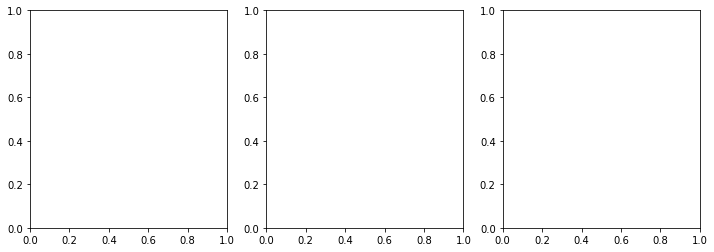

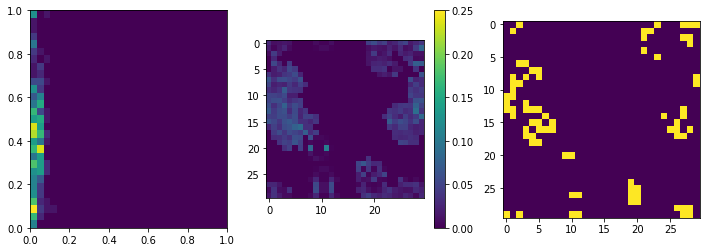

In [47]:
main(dct=tst_dct[0])
plt.show()

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in divide
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in divide


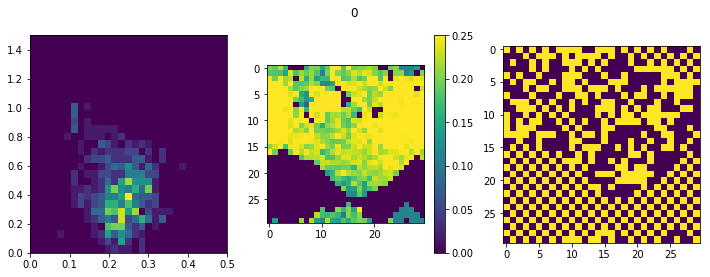

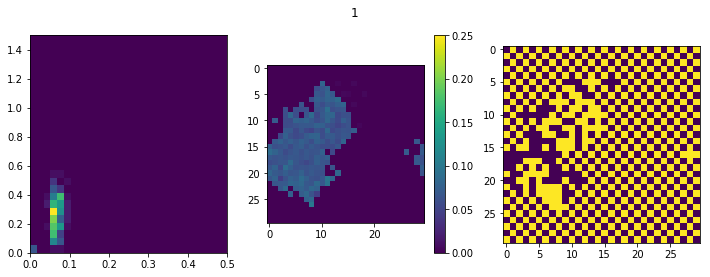

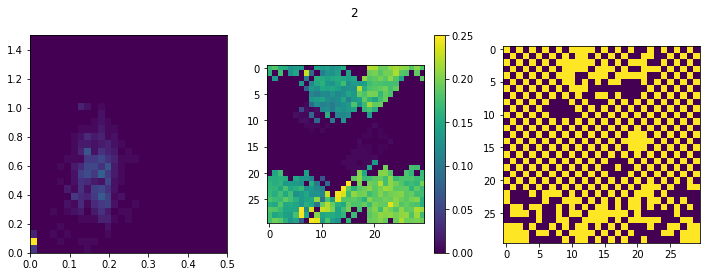

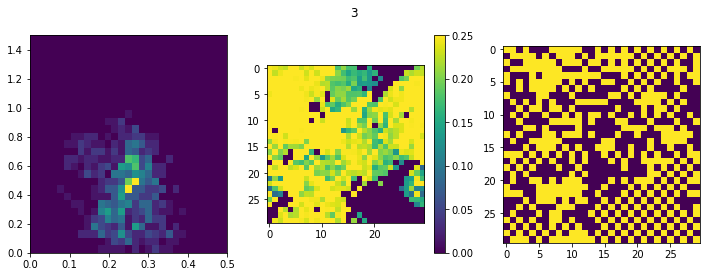

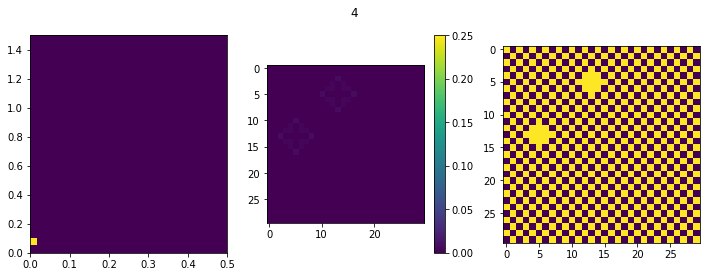

In [57]:
# map(lambda x:main(dct=x),tst_dct)
for i in range(5):
    main(dct=tst_dct[8])
    plt.suptitle(i)
    plt.show()

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in divide
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in divide


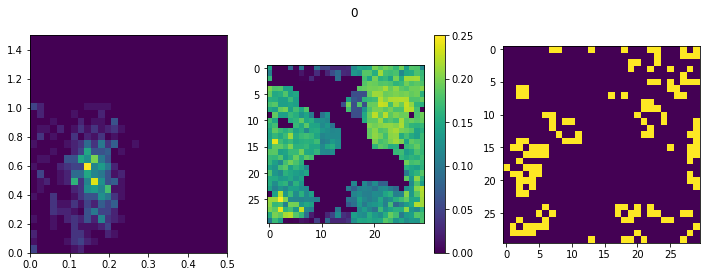

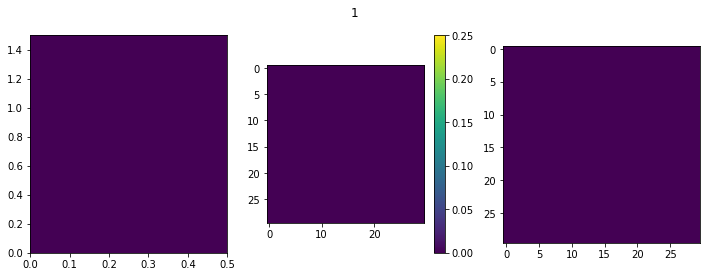

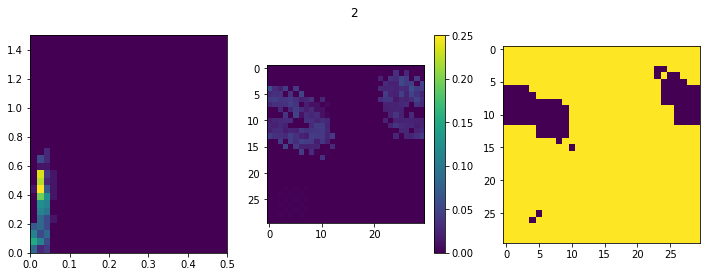

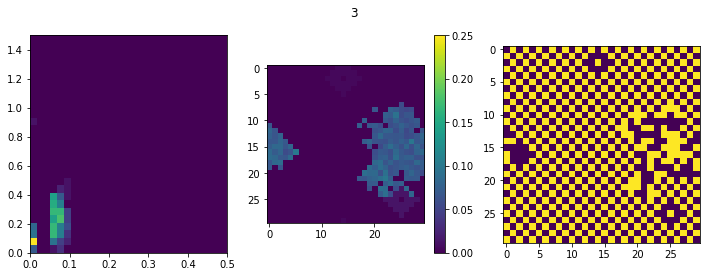

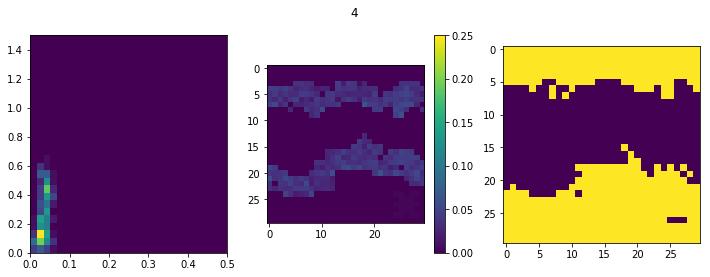

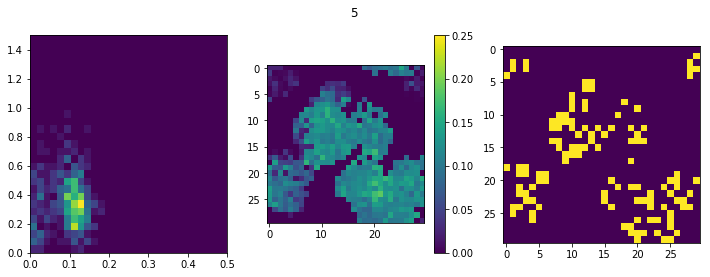

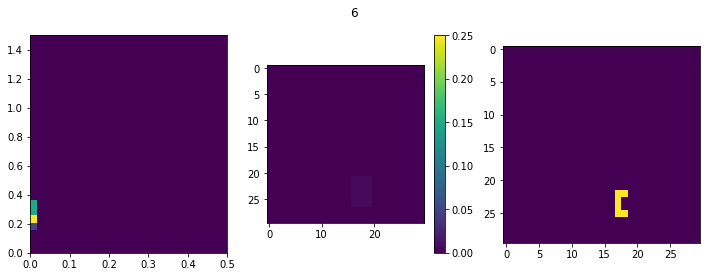

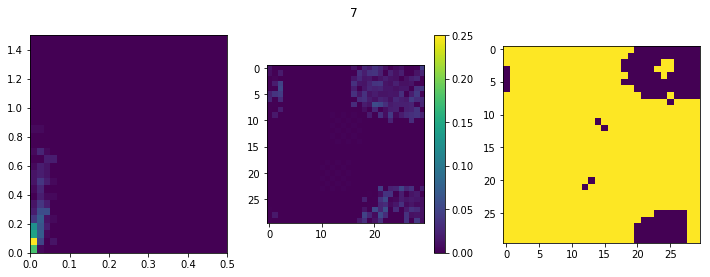

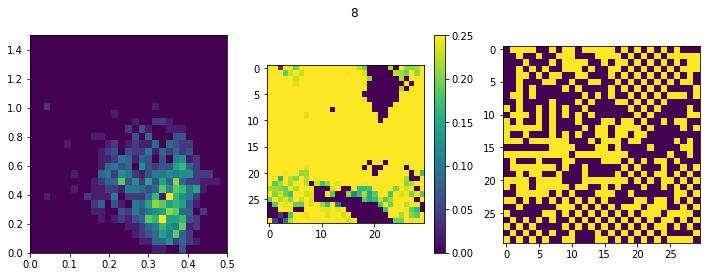

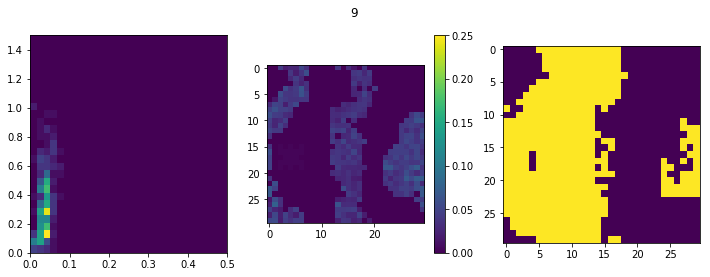

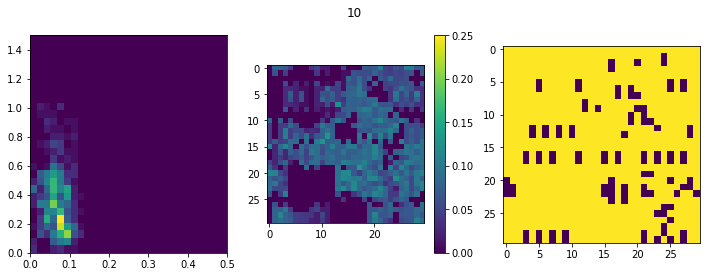

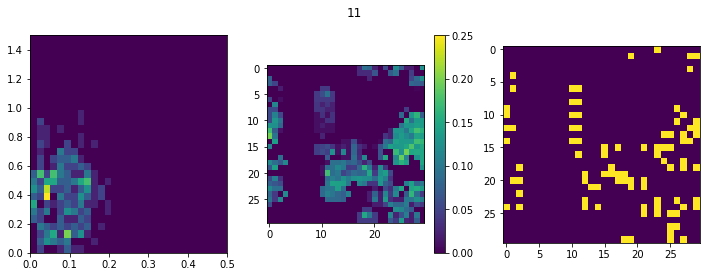

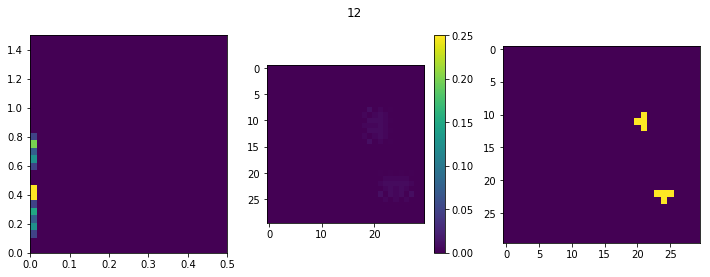

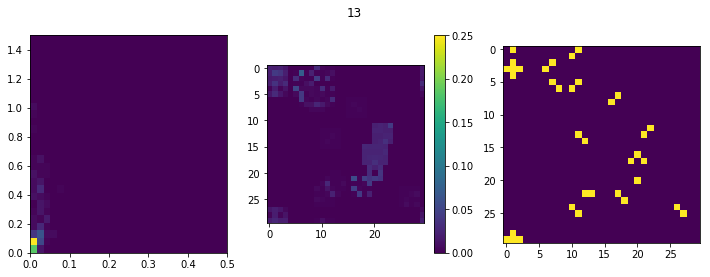

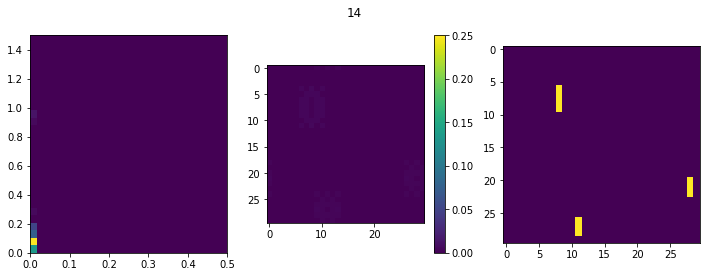

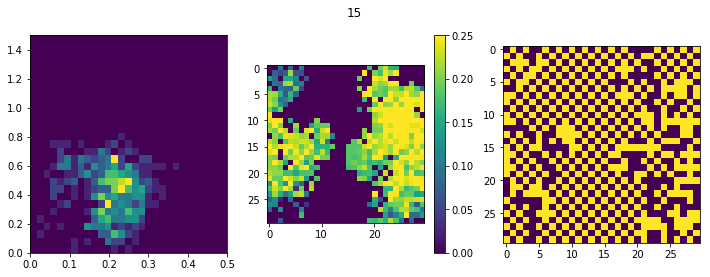

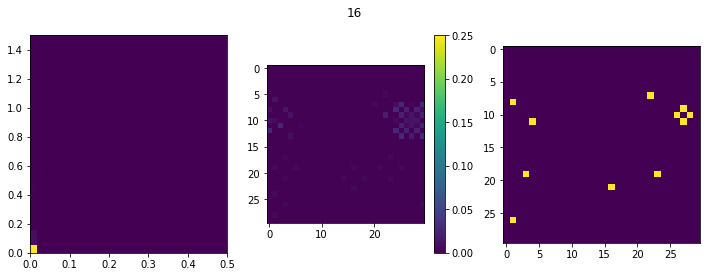

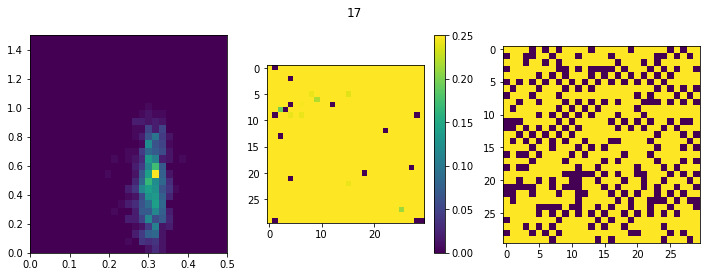

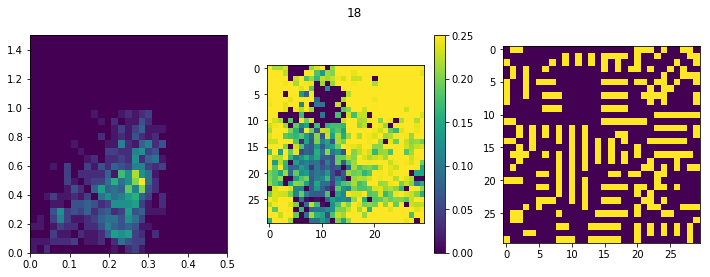

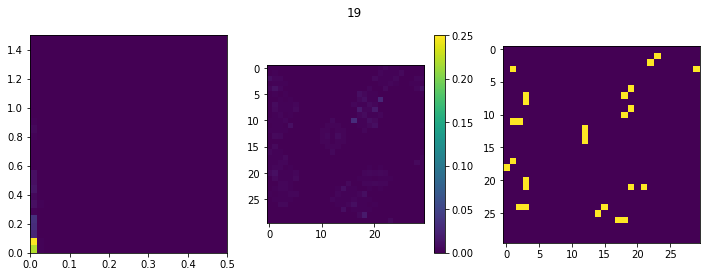

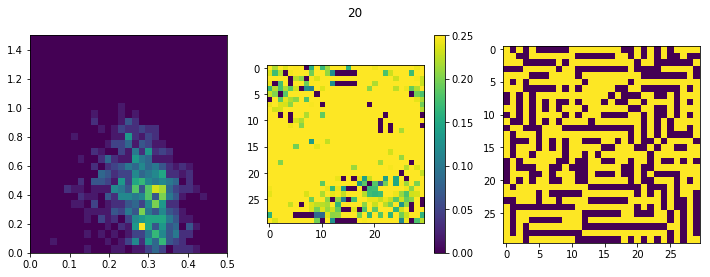

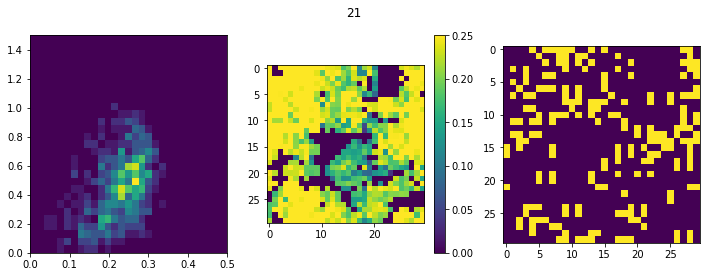

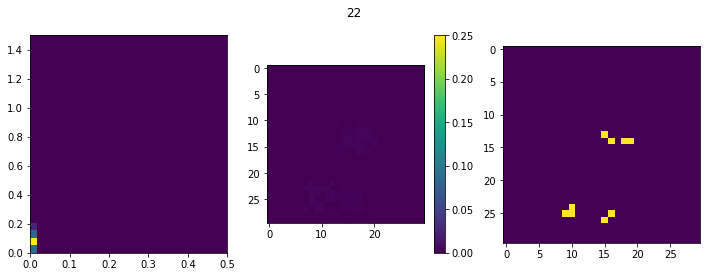

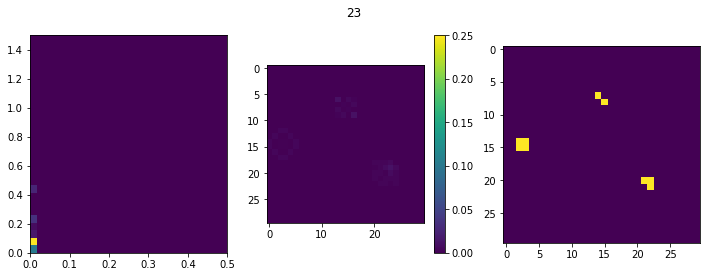

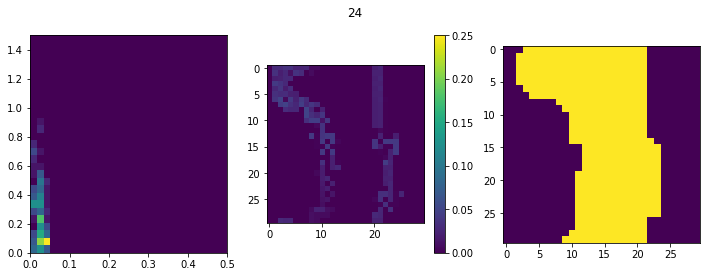

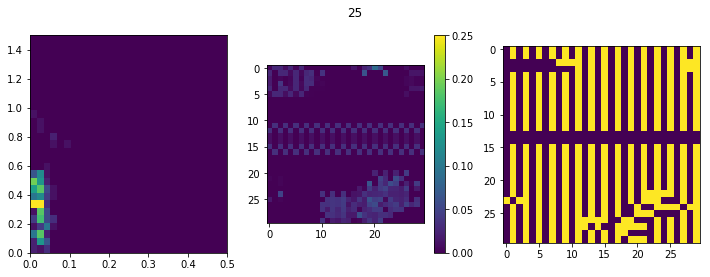

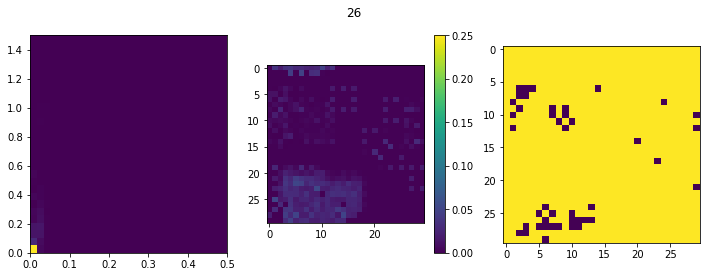

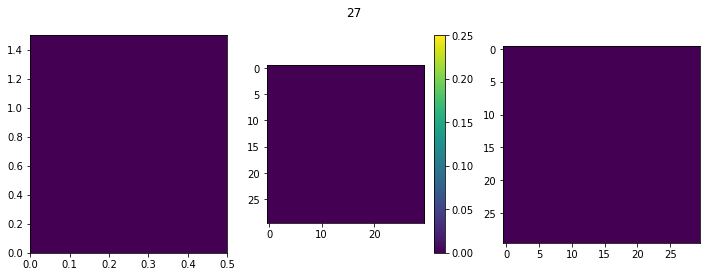

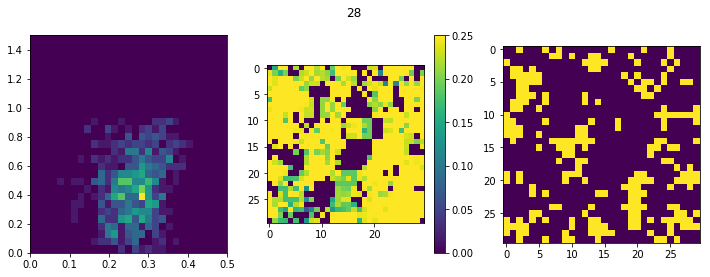

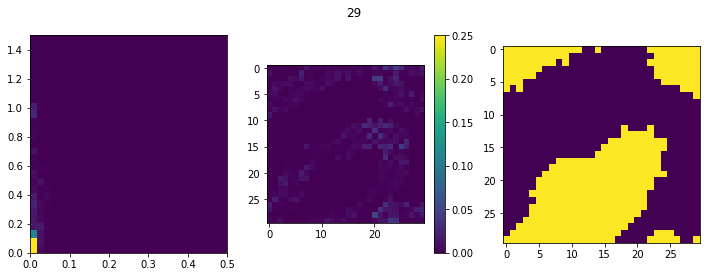

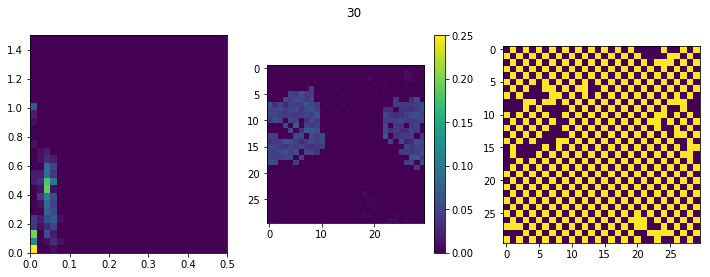

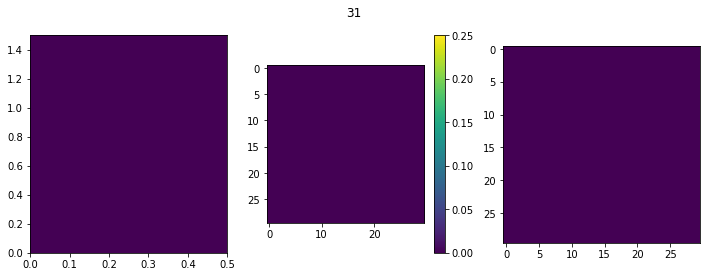

In [58]:
# map(lambda x:main(dct=x),tst_dct)
for i,x in enumerate(tst_dct):
    main(dct=x)
    plt.suptitle(i)
    plt.show()

In [35]:
print kb.rulestr2alias(tst_dct[5]['rulestr'])

b3aeikq2ce5c4aeikws1ce3aceijknqry7ce6aceikn


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in divide
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in divide


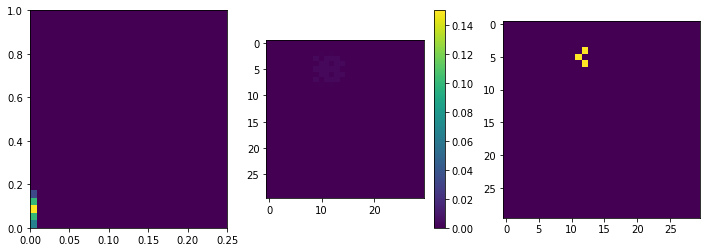

In [12]:
main(dct=tdct)
plt.show()

In [1574]:
def medc(t):
    X = np.arange(0,L)
    X,Y = np.meshgrid(X,X)
    fc= flaw[t:t+1]
    Xs = fc*X[None,None]
    Ys = fc*Y[None,None]
    fN = fc.sum(axis=(2,3))
    Xm=abs(Xs.sum(axis=(2,3)).astype(float)/fN- X.T.ravel()[None])
    Ym=abs(Ys.sum(axis=(2,3)).astype(float)/fN- Y.T.ravel()[None])

    dN = np.minimum(Xm,L-Xm) + np.minimum(Ym,L-Xm)

    # d = dist*fc
    # dN = d.sum(axis=(2,3))
    c = (dN.astype(float)/(fN))
    return c
c = medc(20)-medc(10)
# c = (dN.astype(float))
# c = (dN.astype(float)/np.log(fN))

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [1217]:
sl

(array([], dtype=int64), array([], dtype=int64))

In [1581]:
%%time
import numpy as np
from numpy.lib import stride_tricks
x = np.arange(900).reshape([30, 30])
xx = stride_tricks.as_strided(x, shape=(900, 3, 3, 3), strides=x.strides + x.strides)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 78.9 µs


In [11]:

r = kb.alias2rulestr('B012ak3cijnq4aceijy5ejky6ce7c8/S01c2c3aejkn4aeiwy5y')
print r
tdct = {'family':'2dntca',
       'rulestr':r}
print gollyrle(ini[0])

101c25740140a8406510e93f2f


NameError: name 'ini' is not defined

b1ce03cijnq2ak5acinqr4aceijy7c6aikn8s1c03aejkn2aeikn5y4cjknqrtz6n


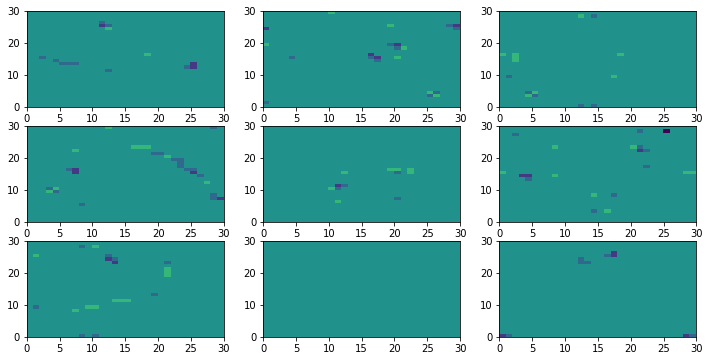

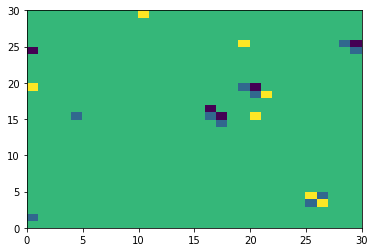

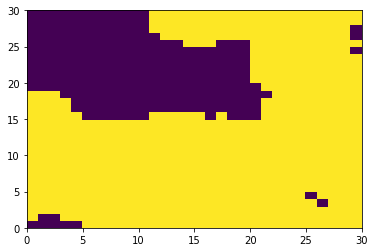

5b25o$1o2b27o$30o$26o1b3o$25o1b4o$30o$30o$30o$30o$30o$30o$30o$30o$30o$30o$5o6b5o1b1o3b9o$4o17b9o$4o17b9o$3o19b8o$21b9o$20b10o$20b10o$20b10o$20b10o$20b9o1b$14b3o3b10o$12b17o1b$11b18o1b$11b19o$11b19o


In [1644]:
env = KBs.guess(dct=tst_dct[15])
# env = KBs.guess(dct=tst_dct[20])
# env = KBs.guess(dct=tst_dct[0])
env = KBs.guess(dct=tst_dct[2])
# env = KBs.guess(dct=tst_dct[8])

# env = KBs.guess(dct=tst_dct[8])
# env = KBs.guess(dct=tst_dct[3])
# env = KBs.guess(dct=tdct)
env.change_size((20, 100, 30**2))
print env.alias
out = sample(env)
# plt.imshow(sflatten(ini[0]))
MEAN = np.mean(out[-6:],axis=0)
imlstshow(MEAN[:10])
plt.show()

MEAN = np.mean(out[-6:],axis=0)
i=1
ini = MEAN[i:i+1]
plt.pcolormesh(ini[0])
plt.show()
ini = out[-7][i:i+1]
plt.pcolormesh(ini[0])
plt.show()
print gollyrle(ini[0])


In [16]:
print kb.rulestr2alias(tst_dct[23]['rulestr'])

b3eijnqr2e5cikqr4jkny7e6ceins3aqy2ace5acejky4aejry7ce6aik8


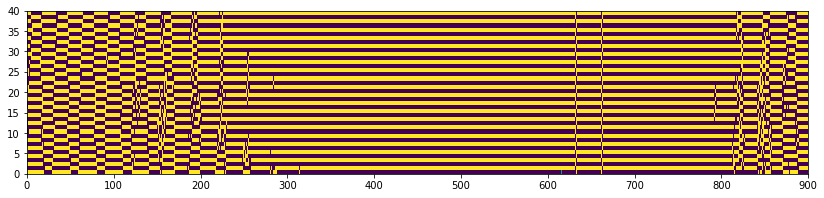

In [1483]:
# arr = SUM[:40,770]
plt.figure(figsize=[14,3])
arr = SUM[:40,500]
plt.pcolormesh(sflatten(arr))
# plt.imshow(arr[1]==1)
# plt.pcolormesh(arr[7]==1)
# plt.imshow(sflatten(SUM[:20,500]))
plt.show()
def sexpand(arr,d=2):
    S = arr.shape
    root = int(round(S[1]**(1./d)) )
    out = np.reshape(arr,(S[0],)+(root,)*d)
    return out


In [1121]:
x=np.arange(12).reshape((3,4))
print x
print np.roll(x,(1,1),axis=(0,1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[11  8  9 10]
 [ 3  0  1  2]
 [ 7  4  5  6]]


$$
sureness = - H(P)
$$
penalise randomness and prefer concentrated distribution
then calculate E(d) to indicate the drifting 

799
800
801
769
770
771
739
740
741


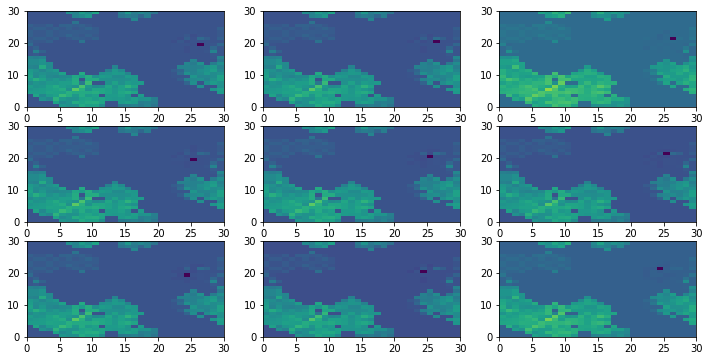

In [1092]:
t = 10
# arr = out[:t,1:]
# arr = np.moveaxis(arr,1,0)
arr = out[t,1:]
arr = sflatten(arr)
d = spdist.pdist(arr,'hamming')
D = spdist.squareform(d) 
np.fill_diagonal(D,-0.05)

De = sexpand(D)

i0,j0 = np.random.randint(1,L-1,size=(2,))
i0 = 25
j0 = 20
shift = [[1,-1],
       [1,0],
       [1,1],
       [0,-1],
       [0,0],
       [0,1],
       [-1,-1],
       [-1,0],
       [-1,1],
      ]
lst = []
for si,sj in shift:
    i = i0+si
    j = j0+sj
    idx = np.ravel_multi_index([[i],[j]],out.shape[2:])[0]
    print idx
    lst.append(De[idx].T)
# # plt.pcolormesh(De[idx].T,vmin=0,vmax=0.25)
# # plt.imshow(out[0][0].T)
# plt.imshow(De[idx],vmin=0,vmax=0.5)
# plt.xlabel('i')
# plt.ylabel('j')
# plt.plot(i,j,'ro')
imlstshow(lst,vmin=-.05,vmax=2.**(t-2.7)/(L**2))
# imlstshow(lst,vmin=-.05,vmax=0.5)
plt.show()
# .shape

Counter({74: 11, 93: 11, 26: 4, 55: 4, 16: 3, 43: 3, 61: 2, 8: 1, 25: 1, 31: 1, 33: 1, 42: 1, 44: 1, 45: 1, 49: 1, 50: 1, 51: 1, 53: 1, 56: 1, 64: 1, 65: 1, 76: 1, 77: 1, 80: 1, 83: 1, 87: 1, 89: 1, 94: 1, 95: 1})


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in divide


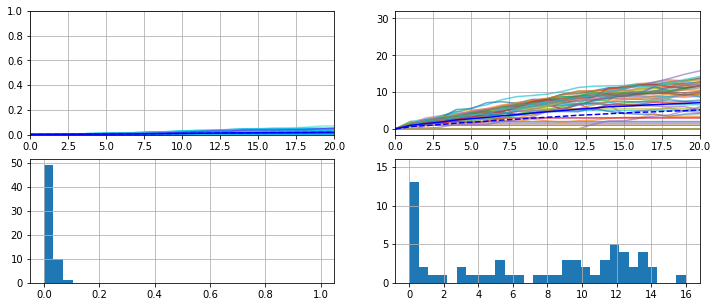

In [130]:
# env = KBs.guess(dct=tst_dct[20])
# env = KBs.guess(dct=tst_dct[15])

def main(env):
# if 1:
    nsp = 60
    out = KBs.sample(env)
    prev = out
    cmap = plt.get_cmap('rainbow')
    L = env.siz[-1]
    X = np.arange(0,L)-L//2
    X = abs(X)
#     X = np.minimum(L-X,X)
    X,Y = np.meshgrid(X,X)
    D =  X+Y
    D = D[None,None]

    # loc = np.vstack([range(1,nsp+1),
    #                 np.random.randint(0,env.siz[-1],size=(2,nsp))]
    #                )
    # idx = np.ravel_multi_index(loc, (nsp+1,)+env.siz[1:] )

    loc = np.vstack([range(0,nsp),
                     np.ones((2,nsp),np.int,)*L//2,
#                      np.ones((2,nsp),np.int,),
#                      np.zeros((2,nsp),np.int,),
    #                 np.random.randint(0,env.siz[-1],size=(2,nsp))
                    ]
                   )
    idx = np.ravel_multi_index(loc, (nsp,)+env.siz[1:] )

    real = prev[-1,:nsp]
    dev = real.copy()
    rcini = kb.conv(real[:,:3,:3])[:,1,1].ravel()
    ct = collections.Counter(rcini)
    print ct
    # snap = prev[-1,0:1]
    # snap = np.repeat(snap,nsp+1,axis=0)
    dev.flat[idx]=1-dev.flat[idx]
    ini= np.vstack([real,dev])
    out = sample(env,ini=ini)
    SUM = (out[:,:nsp] + out[:,nsp:])
    flaw = SUM==1
    fMEAN = flaw.mean(axis=(2,3) )
    
    # nonz = fMEAN[3]!=0
    # # flaw=flaw.take(nonz,axis=1)
    # flaw=flaw[:,nonz]
    # fMEAN=fMEAN[:,nonz]

    # print dMEAN.shape
    # fMEAN=fMEAN.take(nonz,axis=1)
    XLIM=[0,20]
    tv = 20

    dMEAN=(flaw*D).mean(axis=(2,3))
    dMEAN=np.nan_to_num(dMEAN/fMEAN)
    # dMEAN[np.isnan(dMEAN)]
    # np.nan_to_num(dMEAN)
    fig,axs=plt.subplots(2,2,figsize=[12,5])
    axs=axs.flat
    plt.sca(axs[0])
    for c,xs in zip(rcini,fMEAN.T):
        plt.plot(xs,alpha=0.65,c=cmap(c))
    plt.plot(fMEAN.mean(axis=-1),'b',alpha=1)
    plt.plot(fMEAN.std(axis=-1),'b--',alpha=1)
    plt.grid()
    plt.ylim(0,1)
    plt.xlim(XLIM)

    plt.sca(axs[2])
    plt.hist(fMEAN[tv],bins=np.linspace(0,1,30))
    plt.grid()

    plt.sca(axs[1])
    plt.plot(dMEAN,alpha=0.65)
    plt.plot(dMEAN.mean(axis=-1),'b',alpha=1)
    plt.plot(dMEAN.std(axis=-1),'b--',alpha=1)
    plt.xlim(XLIM)
    plt.grid()

    plt.sca(axs[3])
    plt.hist(dMEAN[tv],bins=np.linspace(0,16,30))

    plt.grid()
    plt.ylim(0,16)
    # plt.pcolormesh(sflatten(SUM[:50,3]))
    plt.show()
    return SUM
main(env) ;


Counter({96: 10, 30: 9, 31: 3, 33: 3, 58: 3, 69: 3, 83: 3, 46: 2, 67: 2, 92: 2, 97: 2, 98: 2, 6: 1, 21: 1, 22: 1, 23: 1, 27: 1, 32: 1, 48: 1, 54: 1, 55: 1, 60: 1, 63: 1, 66: 1, 68: 1, 71: 1, 79: 1, 87: 1})


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in divide


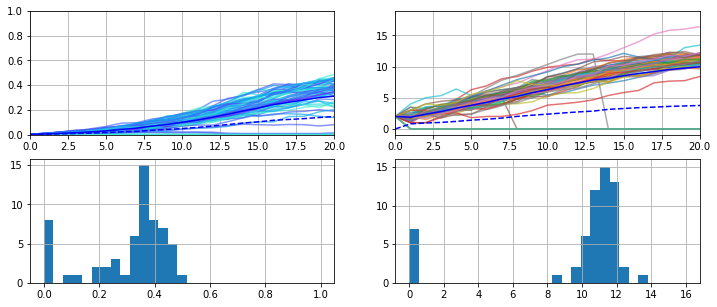

Counter({74: 19, 93: 10, 43: 3, 78: 3, 26: 2, 75: 2, 79: 2, 1: 1, 9: 1, 16: 1, 21: 1, 41: 1, 45: 1, 48: 1, 50: 1, 58: 1, 64: 1, 68: 1, 80: 1, 83: 1, 85: 1, 88: 1, 90: 1, 94: 1, 95: 1, 97: 1})


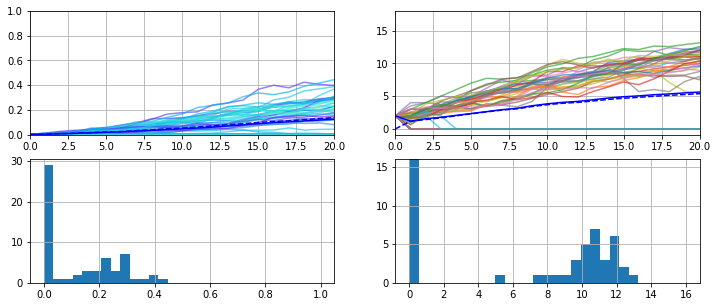

Counter({93: 16, 74: 11, 26: 4, 12: 2, 16: 2, 67: 2, 75: 2, 94: 2, 2: 1, 6: 1, 25: 1, 35: 1, 37: 1, 43: 1, 49: 1, 51: 1, 53: 1, 55: 1, 64: 1, 66: 1, 68: 1, 72: 1, 77: 1, 78: 1, 80: 1, 81: 1, 89: 1})


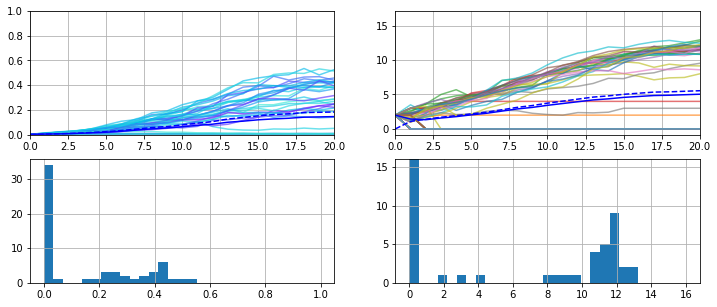

In [53]:
env = KBs.guess(dct=tst_dct[20])
main(env)
env = KBs.guess(dct=tst_dct[15])
main(env)
env = KBs.guess(dct=tst_dct[8])
o = main(env);


In [62]:
print env.dimsiz


(256, 128, 576)


Counter({0: 21, 1: 9, 3: 4, 2: 3, 5: 2, 8: 2, 9: 2, 51: 2, 6: 1, 12: 1, 13: 1, 15: 1, 17: 1, 18: 1, 20: 1, 24: 1, 37: 1, 47: 1, 52: 1, 54: 1, 55: 1, 63: 1, 91: 1})


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in divide


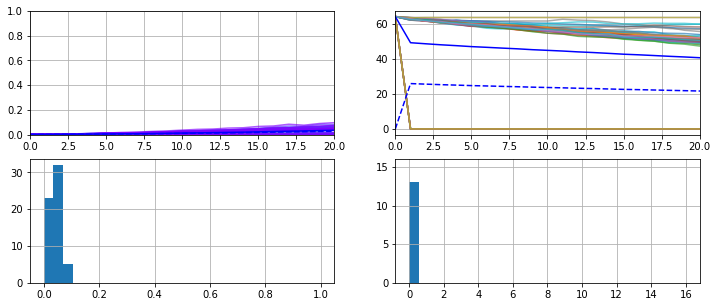

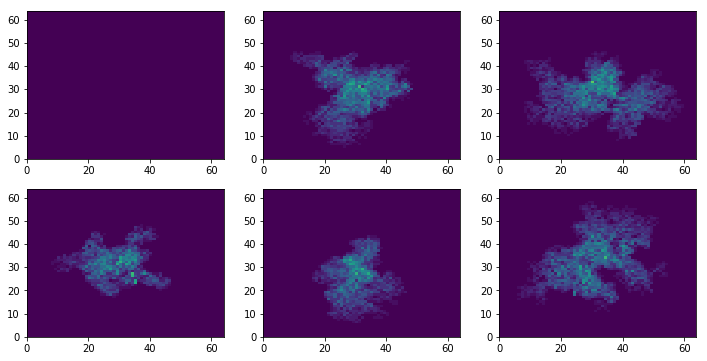

In [114]:
# env = KBs.guess(dct=tst_dct[8])
env = KBs.guess(dct=tst_dct[0])
# env.dimsize=(256,128,64**2)
# env.change_size((256,64,64**2))
env.change_size((60,60,64**2))
# sample(env)
o = main(env)
o = (o[2:30] == 1).mean(axis=0)
fig,axs=plt.subplots(2,3,figsize=[12,6])
for ax,i in zip(axs.ravel(),range(6)):
    im = o[i]
#     if im.sum()==0:
#         continue
    plt.sca(ax)
    plt.pcolormesh(sflatten(im),vmin=0,vmax=1)
plt.show()

Counter({74: 14, 93: 13, 64: 4, 75: 4, 43: 3, 26: 2, 2: 1, 12: 1, 21: 1, 27: 1, 40: 1, 49: 1, 51: 1, 55: 1, 61: 1, 71: 1, 73: 1, 76: 1, 81: 1, 82: 1, 86: 1, 89: 1, 92: 1, 94: 1, 100: 1, 101: 1})


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in divide


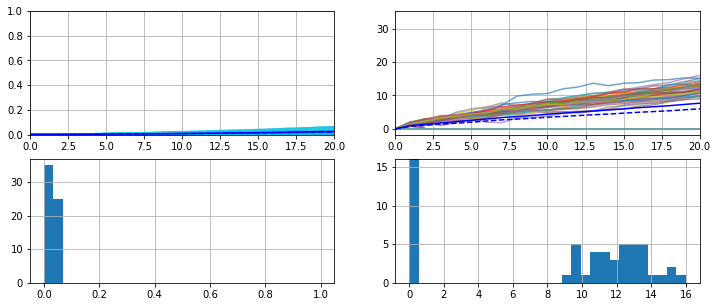

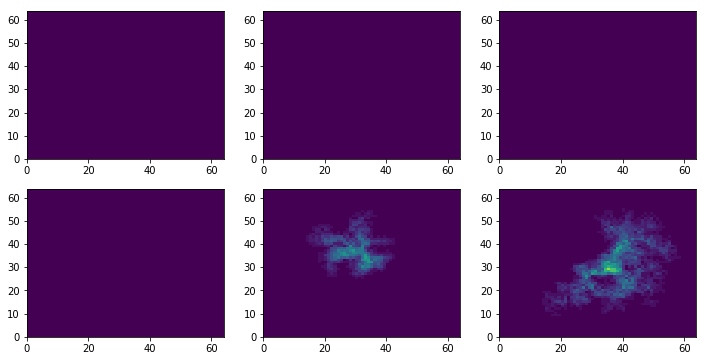

In [146]:
# env = KBs.guess(dct=tst_dct[8])
env = KBs.guess(dct=tst_dct[15])
# env.dimsize=(256,128,64**2)
# env.change_size((256,64,64**2))
env.change_size((60,60,64**2))
# sample(env)
o = main(env)
o = (o[2:30] == 1).mean(axis=0)
fig,axs=plt.subplots(2,3,figsize=[12,6])
for ax,i in zip(axs.ravel(),range(6)):
    im = o[i]
#     if im.sum()==0:
#         continue
    plt.sca(ax)
    plt.pcolormesh(sflatten(im),vmin=0,vmax=1)
plt.show()

Counter({96: 8, 73: 4, 30: 3, 33: 3, 23: 2, 31: 2, 44: 2, 62: 2, 66: 2, 67: 2, 71: 2, 97: 2, 98: 2, 99: 2, 0: 1, 25: 1, 27: 1, 29: 1, 34: 1, 41: 1, 47: 1, 53: 1, 55: 1, 56: 1, 58: 1, 61: 1, 63: 1, 68: 1, 69: 1, 70: 1, 81: 1, 87: 1, 92: 1, 95: 1, 100: 1, 101: 1})


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in divide


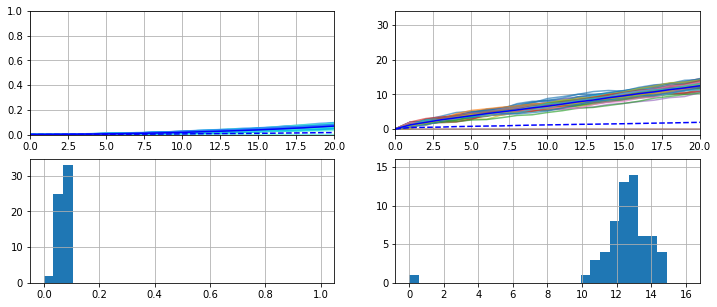

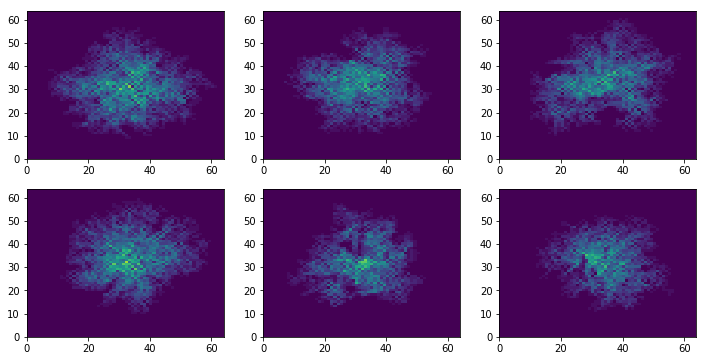

In [140]:
# env = KBs.guess(dct=tst_dct[8])
env = KBs.guess(dct=tst_dct[20])
# env.dimsize=(256,128,64**2)
# env.change_size((256,64,64**2))
env.change_size((60,60,64**2))
# sample(env)
o = main(env)
o = (o[2:30] == 1).mean(axis=0)
fig,axs=plt.subplots(2,3,figsize=[12,6])
for ax,i in zip(axs.ravel(),range(6)):
    im = o[i]
#     if im.sum()==0:
#         continue
    plt.sca(ax)
    plt.pcolormesh(sflatten(im),vmin=0,vmax=1)
plt.show()

b1e03aeiknry2ceikn5acq4aejqrtwz7c6aekns1ce03aij2cei5ijkny4ajt6ik8
Counter({93: 7, 74: 5, 6: 3, 38: 3, 49: 3, 3: 2, 7: 2, 8: 2, 10: 2, 53: 2, 64: 2, 75: 2, 1: 1, 2: 1, 4: 1, 5: 1, 16: 1, 17: 1, 20: 1, 24: 1, 25: 1, 27: 1, 28: 1, 29: 1, 43: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 63: 1, 67: 1, 76: 1, 77: 1, 92: 1, 94: 1, 101: 1})


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in divide


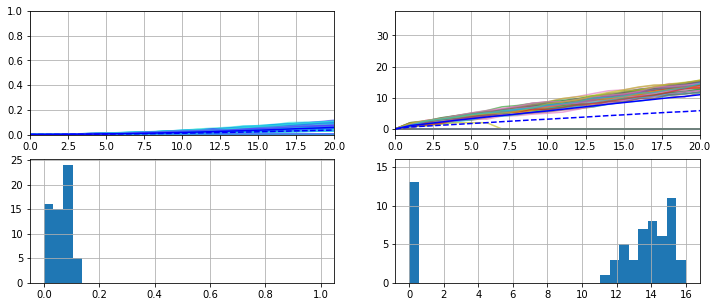

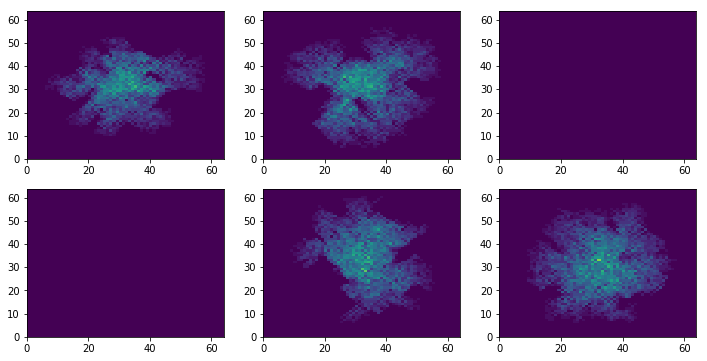

In [147]:
env = KBs.guess(dct=tst_dct[8])
print env.alias
# env = KBs.guess(dct=tst_dct[15])
# env.dimsize=(256,128,64**2)
# env.change_size((256,64,64**2))
env.change_size((60,60,64**2))
# sample(env)
o = main(env)
o = (o[2:30] == 1).mean(axis=0)
fig,axs=plt.subplots(2,3,figsize=[12,6])
for ax,i in zip(axs.ravel(),range(6)):
    im = o[i]
#     if im.sum()==0:
#         continue
    plt.sca(ax)
    plt.pcolormesh(sflatten(im),vmin=0,vmax=1)
plt.show()

b1c3cijk2eik5eijkny4cejknrwz7ce6aceikn8s1e03cery2n5knry4ciknw7ce6aik8
Counter({100: 11, 98: 9, 78: 4, 99: 4, 101: 3, 13: 2, 26: 2, 79: 2, 92: 2, 97: 2, 6: 1, 29: 1, 40: 1, 45: 1, 46: 1, 50: 1, 51: 1, 53: 1, 56: 1, 64: 1, 67: 1, 69: 1, 71: 1, 72: 1, 73: 1, 81: 1, 87: 1, 88: 1, 89: 1})


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in divide


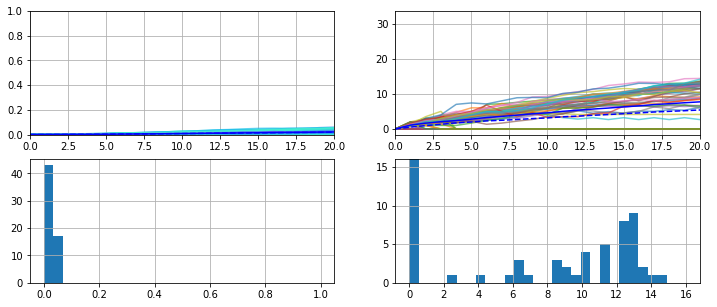

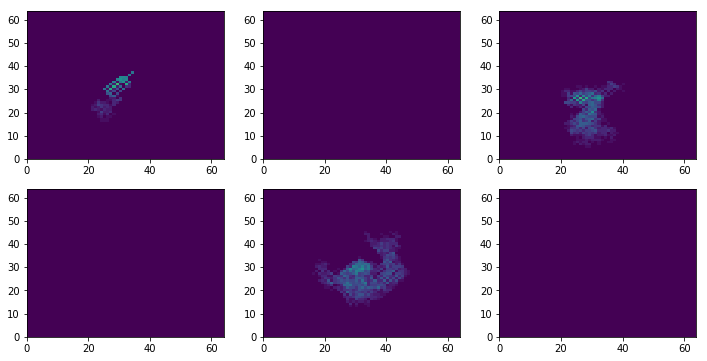

In [160]:
env = KBs.guess(dct=dant[0]['rule'])
print env.alias
# env = KBs.guess(dct=tst_dct[15])
# env.dimsize=(256,128,64**2)
# env.change_size((256,64,64**2))
env.change_size((60,60,64**2))
# sample(env)
o = main(env)
o = (o[2:30] == 1).mean(axis=0)
fig,axs=plt.subplots(2,3,figsize=[12,6])
for ax,i in zip(axs.ravel(),range(6)):
    im = o[i]
#     if im.sum()==0:
#         continue
    plt.sca(ax)
    plt.pcolormesh(sflatten(im),vmin=0,vmax=1)
plt.show()

Counter({74: 17, 93: 17, 43: 2, 55: 2, 86: 2, 94: 2, 3: 1, 14: 1, 20: 1, 26: 1, 32: 1, 47: 1, 48: 1, 50: 1, 53: 1, 54: 1, 56: 1, 59: 1, 61: 1, 63: 1, 72: 1, 75: 1, 79: 1, 91: 1})


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in divide


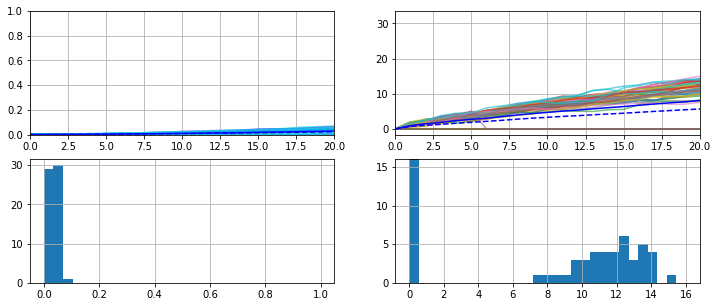

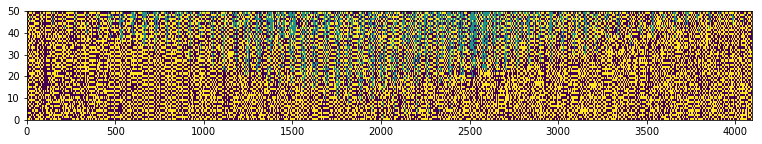

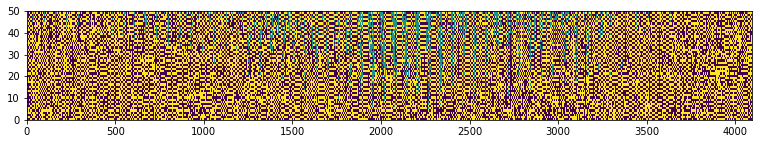

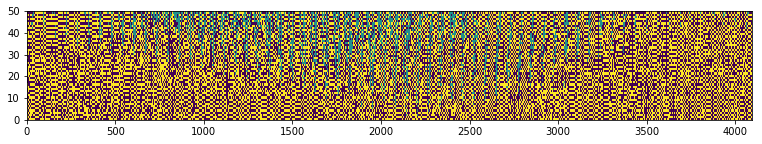

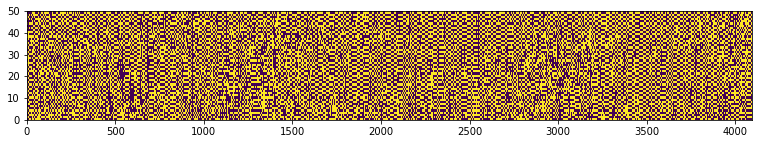

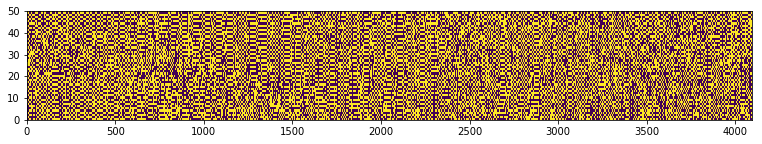

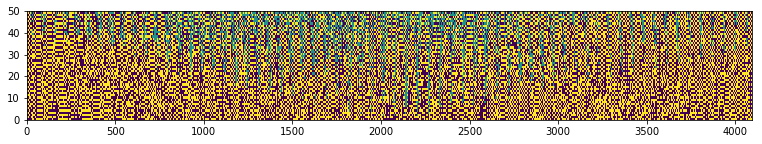

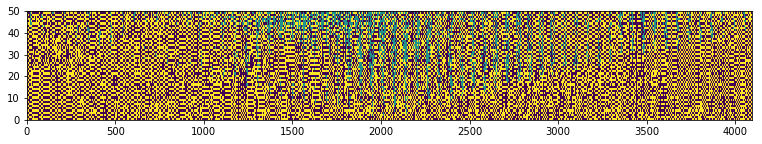

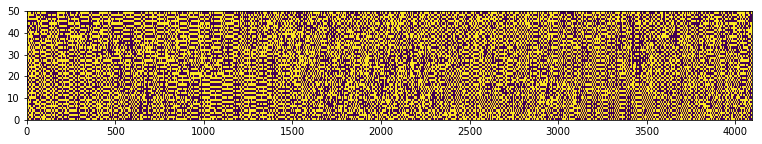

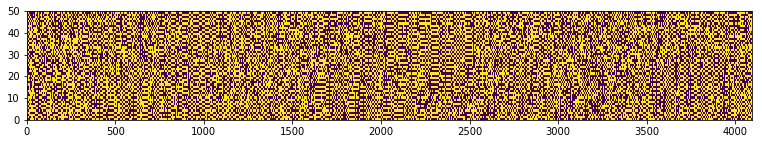

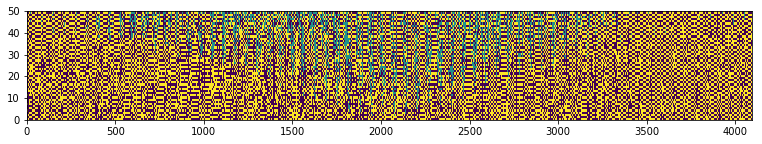

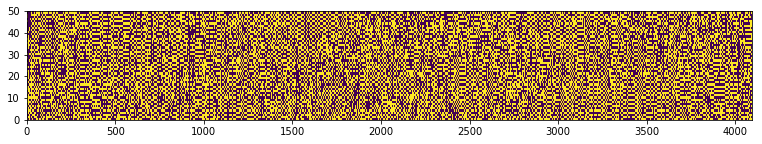

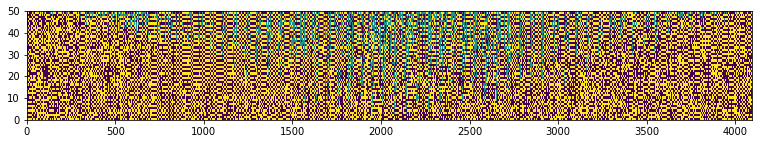

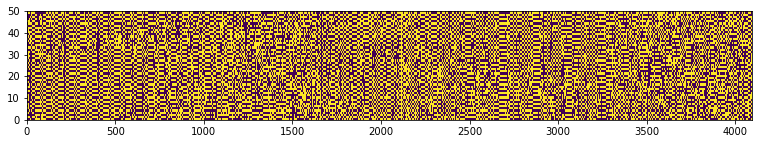

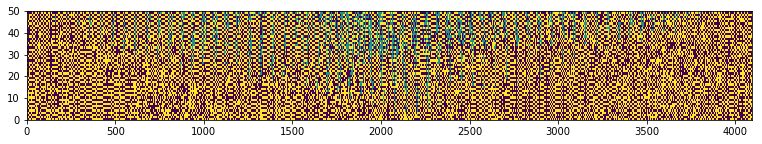

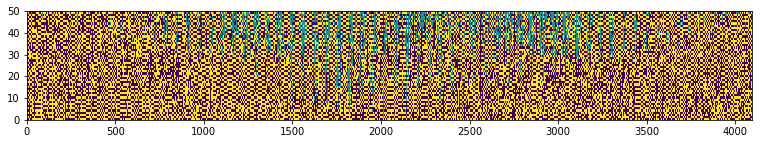

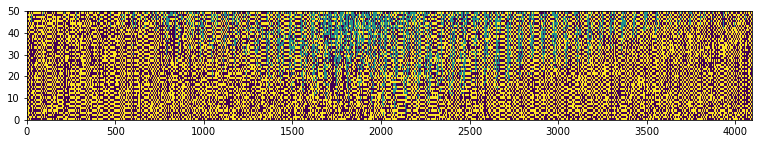

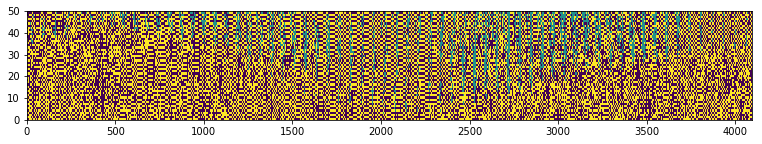

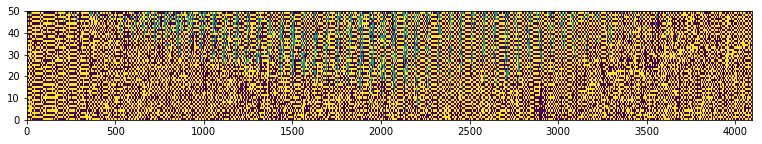

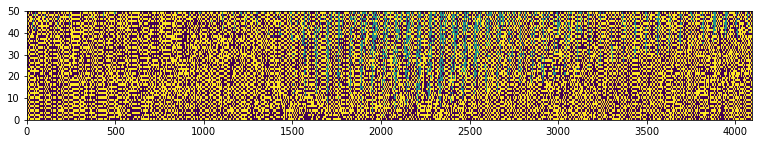

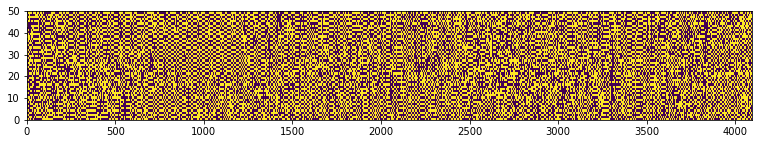

In [1114]:
env = KBs.guess(dct=tst_dct[8])
env = KBs.guess(dct=tst_dct[15])
# env.dimsize=(256,128,64**2)
# env.change_size((256,64,64**2))
env.change_size((60,60,64**2))
# sample(env)
o = main(env)
for i in range(20):
    plt.figure(figsize=[13,2])
    plt.pcolormesh(sflatten(o[:50,i]))
    plt.show()

In [60]:
KBs.lview(KBs.guess(dct=tst_dct[13]))

http://newflaw.com/view.php?rule_alias=b3ceiry2e5ijkny4cejknqrtz7ce6akns1e3acijy2aci5cq4ceiqrwz7c6in


'http://newflaw.com/view.php?rule_alias=b3ceiry2e5ijkny4cejknqrtz7ce6akns1e3acijy2aci5cq4ceiqrwz7c6in'

In [287]:
# np.nonzero?
fMEAN[0]

array([0.00173611, 0.00173611, 0.00173611, 0.00173611, 0.00173611,
       0.00173611, 0.00173611, 0.00173611, 0.00173611, 0.00173611,
       0.00173611, 0.00173611, 0.00173611, 0.00173611, 0.00173611])

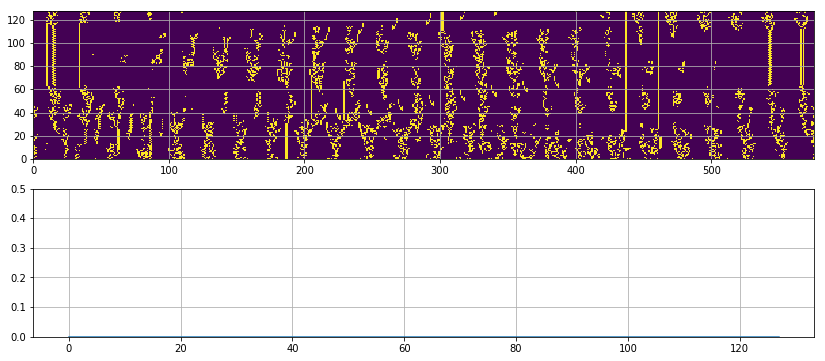

In [147]:

snap0 = prev[-1,0:1]
snap = np.repeat(snap0,2,axis=0)
lst = []
for i in range(10):
    i,j=np.random.randint(snap.shape[-1],size=(2,))
#     snap[1,i,j] = 1-snap[1,i,j]  
#     snap.flat[1] = 1-snap.flat[1]  
    out = sample(env,ini=snap)
    out = np.mean(out,axis=1)
    out = out[:]
    lst+=[out]
lst = np.array(lst)
# diff = lst[]
# out = hill(out)
# print out.shape
# convolve_int(out,[[[[0.5,0.5]]]])
fig,axs=plt.subplots(2,1,figsize=[14,6])
plt.sca(axs[0])
plt.pcolormesh(sflatten(lst[0]))
plt.grid()
plt.sca(axs[1])
# plt.plot(sflatten(out==0.5).mean(axis=1))
plt.plot(hill(sflatten(out)).mean(axis=1))
plt.ylim(0,0.5)
plt.grid()
plt.show()

(10, 1, 128, 24, 24)